In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# BasePath = "data/Example/"

In [3]:
# Files = os.listdir(BasePath)
# print(Files)
# TestFile = os.listdir(BasePath + Files[1])
# print(TestFile)

In [4]:
# def clean_data(X, extra_columns = []):
#     print(X.head())
#     X.drop(X[X['Status'] != 'Beëindigd'].index, inplace = True)
#     # Add Gebruikte tijd later again.
#     cols = ['E-mailadres', 'Voornaam', 'Achternaam', 'Status', 'Gestart op', 'Voltooid', 'Gebruikte tijd']

#     if extra_columns:
#         for i in extra_columns:
#             cols.append(i)

#     X.drop(columns= cols, inplace = True)
#     # I hate everything about this line
#     X = X.replace(',','.', regex=True).replace('-', '0', regex=True).astype(float).astype(int)
#     return X

# def group_y(Y, total_options_of_y):
#     val = int(total_options_of_y/3)
#     print(len(Y))
#     print(type(Y))
#     for i, y in Y.items():
#         if y <= val :
#             Y[i] = 0
#         elif y >= val and y <= (val*2):
#             Y[i] = 1
#         elif y >= (val*2):
#             Y[i] = 2
#     return Y

In [5]:
# def split_data(x_data, y_data, test_size):
#     X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_size)
#     return X_train, X_test, y_train, y_test

# def getXY(dataset, exclude):
#     X = dataset.drop([exclude], axis=1)
#     Y = dataset[exclude]

#     return X, Y

# def get_accuracy(Model, X, Y):
#     predict_list = Model.predict(X)

#     accuracy = accuracy_score(Y, predict_list)

#     return accuracy, predict_list

In [6]:
# Test = pd.read_csv(BasePath + Files[1] + "/" + TestFile[0])
# print(Test)

# # Remove all the nasty data
# CleanTest = clean_data(Test)
# CleanTest.head(n=2)

# # Obtain X and Y to test effectiveness later
# #X, y = getXY(CleanTest, "Cijfer/26,00")

# # print(len(y))
# # print(len(X))

# #Y = group_y(y, 27)

# # print(Y)
# # print(len(Y))

# # Obtain train Test data
# # X_train, X_test, y_train, y_test = split_data(X, Y, 0.2)

In [7]:
# gm = GaussianMixture(n_components=3, random_state=0).fit(X)
#
# acc, predict = get_accuracy(gm, X, Y)
# print(acc)

## Some Random plotting tests

In [8]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
#
# #Load Data
# pca = PCA(2)
#
# #Initialize the class object
# kmeans = KMeans(n_clusters= 3)
#
# #predict the labels of clusters.
# label = kmeans.fit_predict(X)
#
# #Transform the data
# df = pca.fit_transform(X)
#
#
# #Getting unique labels
# u_labels = np.unique(label)
#
# #plotting the results:
# for i in u_labels:
#     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# plt.legend()
# plt.show()
#
# # kmeans = KMeans(n_clusters=27, random_state=0).fit(X)
#
# # acc = get_accuracy(gm, X_test, y_test)

## Lucas' Code time for fun and goodness (and maybe clustering based on specific features not from the test scores)

### using exclusively the ctrl+c and ctrl+v keys

In [9]:
# Now that we can cluster students based on the features extracted from the process lables (kind of they all seem to be in the -1 class?)
# We can now combine these features with the features extracted by Ylja and link them based on username

/tmp/ipykernel_3657956/2364324482.py:269: FutureWarning: The default value of regex will change from True to False in a future version.
  user_df['Username'] = user_df['Username'].str.replace('.combined.csv','')


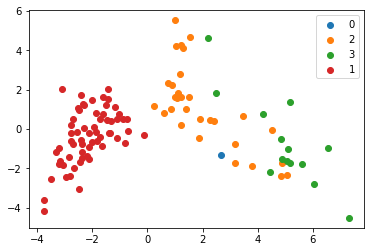

Class 0 has ['High Mean_time_MC.O.4', 'High Mean_time_MC.O.2', 'High Time_spent_MC.O.2', 'High Mean_time_MC.M.3']
Class 1 has ['High Percent_time_MC.O.2', 'High Percent_time_HC.EO.3', 'High Percent_time_MC.M.4', 'Low Time_spent_HC.EO.3']
Class 2 has ['Low Percent_time_MC.O.2', 'Low Percent_time_HC.EO.3', 'Low Percent_time_MC.M.4', 'High Times_performed_HC.EO.3']
Class 3 has ['High Time_spent_LC.F.2', 'High Mean_time_LC.F.7', 'High Time_spent_LC.R.1', 'High Mean_time_LC.R.1']
{'HC.EO.3': 'Learners write the essay continuously', 'LC.F.2': 'Learners read something new and then nagvigate to next page to continue reading', 'LC.F.7': 'Learners read new relevant learning materials for some mins', 'LC.R.1': 'Learners review some relevant learning materials they have been reading before', 'MC.M.3': 'Check planner, during writing the essay, to monitor if there is enough time to finish the essay', 'MC.M.4': 'Learners check timer during reading or writing as monitoring the learning time', 'MC.O.2'

In [28]:
from sklearn.cluster import DBSCAN
import csv
from datetime import datetime
# which features will we use? lets set out some cognition features
# the two different goodness values can be knowledge gained or score in post-test
# lets first take in the process labesl

def fix(X):
    # making sure the users arent clustered on username
    try:
        X = X.drop(columns = ["Username"])
    except:
        pass
    X = (X-X.mean())/X.std()
    # filling the nan values
    X = X.fillna(0)
    return X

def load_process_features_study_f(BasePath_f, f):
  data = pd.read_csv(BasePath_f + f)

  features = {}

  features["Username"] = data['Username'][0]

  proc_labels = np.unique(np.array(data["Process Label"]))
  data["Process_Time_Spent"] = data["Process End Time"] - data["Process Start Time"]
  max_time = np.max(data["Process End Time"])
  # unsure if we want to keep no pattern because they did do something here
  # proc_labels.remove("NO_PATTERN")
  for proc in proc_labels:
      proc_rows = data[data["Process Label"] == proc]

      # feature #1 total time spent on processes
      features[("Time_spent_"+proc)] = [(proc_rows["Process_Time_Spent"]/100).sum()]

      # feature #2 mean time per session process session
      features[("Mean_time_"+proc)] = [(proc_rows["Process_Time_Spent"]/100).mean()]

      # feature #3 amount of times they did a process
      features[("Times_performed_"+proc)] = [proc_rows["Process_Time_Spent"].count()]

      # feature #4 percentage of time spent on a process
      features[("Percent_time_"+proc)] = [(proc_rows["Process_Time_Spent"]/100).sum()/max_time]
 
  # return the features as a df
  return pd.DataFrame.from_dict(features)


def load_process_features_study_3(c_file):
    features = {}
    cleaned = []
    with open(BasePath_3 + c_file, newline='', encoding='utf8') as csvfile:
      spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
      for row in spamreader:
          real = (', '.join(row))
          if real.count(",") == 9:
              cleaned.append(np.array(real.split(",")))
    cleaned = np.array(cleaned)
    data = pd.DataFrame(cleaned, columns = ["logid", "actionid", "patternid", "date", "time",	"log_label", "action_label", "pattern_label", "pattern_span", "log_value"])

    features["Username"] = c_file.split(",")[0]
    # creating the time spent column

    time = list(data["time"])
    time.insert(0, time[0])
    time_spent = []
    FMT = ' %H:%M:%S'
    for i in range(1,len(time)):
      tdelta = datetime.strptime(time[i], FMT) - datetime.strptime(time[i-1], FMT)
      time_spent.append(tdelta.total_seconds())

    data["Process_Time_Spent"] = time_spent
    proc_labels = np.unique(np.array(data["pattern_label"]))


    max_time = data["Process_Time_Spent"].sum()

    proc_labels= list(filter(None, proc_labels))

    # unsure if we want to keep no pattern because they did do something here
    # proc_labels.remove("NO_PATTERN")

    for proc in proc_labels:
      proc_rows = data[data["pattern_label"] == proc]

      # feature #1 total time spent on processes
      features[("Time_spent_"+proc)] = [proc_rows["Process_Time_Spent"].sum()]

      # feature #2 mean time per session process session
      features[("Mean_time_"+proc)] = [proc_rows["Process_Time_Spent"].mean()]

      # feature #3 amount of times they did a process
      features[("Times_performed_"+proc)] = [proc_rows["Process_Time_Spent"].count()]

      # feature #4 percentage of time spent on a process
      features[("Percent_time_"+proc)] = [proc_rows["Process_Time_Spent"].sum()/max_time]

    # return the features as a df
    return pd.DataFrame.from_dict(features)

def cluster(df, user_making_request):
    
    #   finding the index of the user who needs to be isolated
    user_index = df.index[df['Username'] == user_making_request].tolist()
    df.reset_index(inplace = True)

    # removing the username from the data if its there and also reducing to the features 
    # that were requested by the user (boolean map)
    df = fix(df)

    # df = df.loc[:, features]
    # creating labels for the users

    # clustering = DBSCAN(eps=7, min_samples=4).fit(X)
    # return clustering.labels_

    kmeans = KMeans(n_clusters= 3)
    clustering = kmeans.fit_predict(df)
    
#     setting the user's cluster to be 0 on their own
    clustering = clustering + 1
    clustering[user_index] = 0
    return clustering

def create_X(user_df, labels):

  X = fix(user_df)

  labels = pd.DataFrame(labels)

  # selecting only the features the users chose
  # X = user_df[features_chosen]

  #Load Data into pca
  pca = PCA(2)

  #Transform the data into 2 dimensions
  X = pca.fit_transform(X)
  X = pd.DataFrame(X)

  result = pd.concat([X, labels], axis=1)

  result.columns = ['x', 'y', 'label']

  return result

def plot(X):
  u_labels = X['label'].unique()

  for i in u_labels:
      plt.scatter(X['x'].loc[X['label'] == i],
                  X['y'].loc[X['label'] == i],
                  label = i)
  plt.legend()
  plt.show()

def important_features(user_df, labels):
  # how many imortant features do you want?
  num_important = 4

  # getting the unique labels of the clusters to see whats important about them
  u_labels = np.unique(labels)

  # reducing the amount of features to that chosen by the user
  df = fix(user_df)
  
  # creating the averages for each features and each label to compare them
  avgs = pd.DataFrame(columns = df.columns)
  avgs_abs = pd.DataFrame(columns = df.columns)
  avgs.loc[0] = list(df.mean(axis=0))
  important_features_lst = []

  # appending in the df the averages for each label of each feature
  for i in u_labels:
    label_avg = list(df[labels == i].mean(axis=0))
    avgs.loc[i + 1] = label_avg

    # finding which class features have the highest difference from the mean
    avgs_abs.loc[i] = np.abs(avgs.loc[0] - avgs.loc[i + 1])
    important = np.array(avgs_abs.loc[i]).argsort()[-num_important:][::-1]

    feature_list = []
    for feature in important:
      if avgs.iloc[i + 1, feature] > 0:
        feature_list.append(("High "+str(avgs.columns[feature])))
      else:
        feature_list.append(("Low "+str(avgs.columns[feature])))
    important_features_lst.append(feature_list)
  
  for i in range(len(important_features_lst)):
    print("Class",i,"has",important_features_lst[i])

  # alternatively to printing we make a list:
  return important_features_lst

def explain(important_features_lst):
  explain_df = pd.read_csv(r"data/label_names.csv")
  features = np.array(important_features_lst).flatten()
  iso_features = []
  [iso_features.append(f.split("_")[-1]) for f in features]
  iso_features = np.unique(np.array(iso_features))

  explained = {}
  for f in iso_features:
    try:
      out =  explain_df[explain_df["Pattern No."] == f].iloc[:, 2]
      explained[f] = out.iloc[0]
    except:
      continue
  print(explained)

def reduce_df(user_df, features_chosen):
  columns = list(user_df.columns)
  remaining = np.zeros(len(columns))
  remaining[0] = 1
  for feature in features_chosen:
    keep = [col.split("_")[-1] == feature for col in columns]
    remaining = remaining + keep
  reduced = user_df.loc[:, remaining.astype(bool)]
  return reduced

def users_features(reduced_df, user_making_request):
    # Here i define the user making the request
    normalized_df = reduced_df.fillna(0)
    normalized_df=(reduced_df.drop(columns = ['Username'])-reduced_df.drop(columns = ['Username']).mean())/reduced_df.drop(columns = ['Username']).std()
    normalized_df['Username'] = reduced_df["Username"]

    differences = []

    users_list = np.array(normalized_df[normalized_df['Username'] == user_making_request])[0,:-1]

    for user_comp in list(normalized_df['Username']):
        row_values = []
        values = np.abs(users_list - np.array(normalized_df[normalized_df['Username'] == user_comp])[0,:-1])
        row_values.append(normalized_df.columns[np.argmax(values)])
        row_values.append(normalized_df.columns[np.argmin(values)])
        differences.append(row_values)

    differences_df = pd.DataFrame(differences, columns = ["Biggest Difference", "Smallest Difference"])
    differences_df["username"] = list(normalized_df["Username"])
    return differences_df

# ==================== main

users = []

BasePath_3 = r"data/flora Data/Study 3/"
files_3 = os.listdir(BasePath_3)

# getting the combined files
combined_files = []
for x in files_3:
    if "combined.csv" in x:
        combined_files.append(x)

BasePath_f = r"data/Future/Process label/"
files_f = os.listdir(BasePath_f)
for f in files_f:
  users.append(load_process_features_study_f(BasePath_f, f))

for c_file in combined_files:
  users.append(load_process_features_study_3(c_file))

user_df = pd.concat(users)

# print(list(user_df.columns))

user_df['Username'] = user_df['Username'].str.replace('.combined.csv','')

# here i set all features to be chosen for clustering in future this should be chosen by user
features_chosen = pd.read_csv(r"data/label_names.csv")
features_chosen = list(features_chosen["Pattern No."])

features_chosen = features_chosen[1:35]

reduced_df = reduce_df(user_df, features_chosen)

# here you choose the username but this should be an api thing
user_making_request = list(reduced_df['Username'])[46]

labels = cluster(reduced_df, user_making_request)
X = create_X(reduced_df, labels)
plot(X)

user_diff_df = users_features(reduced_df, user_making_request)
    
# here i make a list where the index is the class and the contents is a list of what each class is distinctive at
important_features_lst = important_features(reduced_df, labels)

# making a dictionary that explains each pattern label
features_explained = explain(important_features_lst)


In [11]:
user_df = user_df.reset_index(drop=True) # Reset index to work with concat

result_df = pd.concat([X, user_df['Username']], axis=1)
result_df.rename(columns={"Username": "username"}, inplace=True)
result_df = result_df.join(user_diff_df.set_index("username"), on="username")

print(result_df.head())

              x             y  label  username      Biggest Difference  \
0  1.414884e-01  2.826617e-01      0  fsh1_123  Times_performed_MC.P.2   
1  2.966450e-16  1.674156e-16      0  fsh1_131       Time_spent_MC.P.2   
2  2.142551e-01  3.435102e+00      2  fsp4_221        Mean_time_MC.P.2   
3  2.034253e-16  1.753912e-16      0  fsp4_230       Time_spent_MC.P.2   
4 -1.039478e-15  2.710485e-16      0  fsh1_111       Time_spent_MC.P.2   

   Smallest Difference  
0  Percent_time_MC.P.2  
1    Time_spent_MC.P.2  
2  Percent_time_MC.P.2  
3    Time_spent_MC.P.2  
4    Time_spent_MC.P.2  


In [12]:
# d = (X.groupby('labels')
#      .apply(lambda x: dict(zip(x['X'],x['y'])))
#      .to_dict())

result = dict()
for label in sorted(result_df['label'].unique()):
     label = int(label)

     result[label] = {
          'users':result_df[result_df['label'] == label].drop(columns=['label']).to_dict(orient="records")
     }

print(result)

{0: {'users': [{'x': 0.14148840476262084, 'y': 0.2826617167196065, 'username': 'fsh1_123', 'Biggest Difference': 'Times_performed_MC.P.2', 'Smallest Difference': 'Percent_time_MC.P.2'}, {'x': 2.966450281384318e-16, 'y': 1.674156287555708e-16, 'username': 'fsh1_131', 'Biggest Difference': 'Time_spent_MC.P.2', 'Smallest Difference': 'Time_spent_MC.P.2'}, {'x': 2.0342528991631235e-16, 'y': 1.7539115448738092e-16, 'username': 'fsp4_230', 'Biggest Difference': 'Time_spent_MC.P.2', 'Smallest Difference': 'Time_spent_MC.P.2'}, {'x': -1.0394779281285966e-15, 'y': 2.7104851635259783e-16, 'username': 'fsh1_111', 'Biggest Difference': 'Time_spent_MC.P.2', 'Smallest Difference': 'Time_spent_MC.P.2'}, {'x': 0.10667259314359398, 'y': -0.16822288753938003, 'username': 'fsh1_105', 'Biggest Difference': 'Times_performed_MC.P.2', 'Smallest Difference': 'Time_spent_MC.P.2'}, {'x': -4.8714539144862856e-17, 'y': -1.4567227620877641e-16, 'username': 'fsh1_115', 'Biggest Difference': 'Time_spent_MC.P.2', 'Sm

In [13]:
import json
with open('api/result.json', 'w') as fp:
    json.dump(result, fp)